In [1]:
import pandas as pd
df = pd.read_csv("")  # Ensure the correct path
print(df.head())  # Check if data is loaded


FileNotFoundError: [Errno 2] No such file or directory: '/content/creditcard.csv'

In [13]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
df = pd.read_csv("/content/creditcard.csv")  # Replace with your dataset path
print(df.head())  # Display first few rows


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [16]:
print(df.isnull().sum())  # Check for missing values


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [17]:
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables into numerical


In [18]:
df.rename(columns={"Amount": "amount", "Time": "time"}, inplace=True)


In [19]:
print(df.columns)


Index(['time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'amount',
       'Class'],
      dtype='object')


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['amount', 'time']] = scaler.fit_transform(df[['amount', 'time']])


In [21]:
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target (0 = normal, 1 = fraud)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=26)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=26)

In [23]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9996488887328394
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.85      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



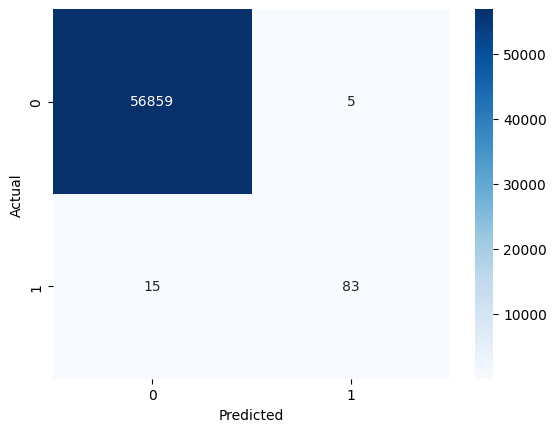

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
import joblib
joblib.dump(model, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

In [26]:
pip install flask fastapi uvicorn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.9 MB/s eta 0:00:00


In [27]:
import pickle

# Save the trained model
with open("fraud_detection_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


In [28]:
from google.colab import files
files.download("fraud_detection_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import pickle

# Load the model
with open("fraud_detection_model.pkl", "rb") as f:
    model = pickle.load(f)

# Check model type
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
